The venue is:  Auckland.xlsx


/Users/mdsamad/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/mdsamad/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1326: RuntimeWarning: divide by zero encountered in log
  return exparg + np.log(0.5 * invK * sc.erfc(-(x - invK) / np.sqrt(2)))


Best Distribution is:  norm
The venue is:  Mirpur.xlsx
Best Distribution is:  logistic
The venue is:  Harare.xlsx
Best Distribution is:  logistic
The venue is:  Sydney.xlsx
Best Distribution is:  logistic
The venue is:  Lahore.xlsx
Best Distribution is:  exponnorm
The venue is:  Sarjah.xlsx
Best Distribution is:  logistic
The venue is:  Bangalore.xlsx
Best Distribution is:  invgauss
The venue is:  Melbourne.xlsx
Best Distribution is:  logistic
The venue is:  Lords.xlsx
Best Distribution is:  logistic
The venue is:  Premadasa.xlsx
Best Distribution is:  logistic
Revised score for equal scoring probability:  263.0
1st innings score: 300  runs.
2nd innings revised target score for equal winning probability:  245.0 runs
Run difference is  55.0 runs
Probability ratio of scoring after equal winning probability 1.3
Revised score for equal scoring probability:  277.0
1st innings score: 315  runs.
2nd innings revised target score for equal winning probability:  262.0 runs
Run difference is  53.

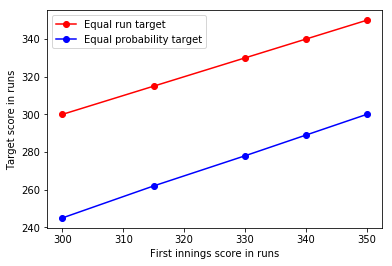

In [2]:
# A probabilistic approach to mitigating bias from coin toss decisions in the game of cricket 

%matplotlib inline

import Source_Codes.ImportAnaData as imprt
import Source_Codes.fitDistribution as fitDis
import Source_Codes.Conti_CDF as contiCDF

import scipy
import pandas as pd
import matplotlib.pyplot as plt


dataPath = 'Data/'
allData = pd.DataFrame()
    
for filename in imprt.mylistdir(dataPath):
    
    print ('The venue is: ', filename)
 
    df = imprt.dataExtract ('Data/'+filename)
    
    # Find the best fitted distribution 
    model = fitDis.BestDistribution(df)
    
    dist = getattr(scipy.stats, model)

    
    # Run the probabilistic model to obtain the revised score for 
    # Second innings play
    
    ################### Analysis revised score ##########
   # runSet = [300, 315, 330, 340, 350]
    
    #for run in runSet:
        
    # Analysis using continuous probability functions 
       # contiCDF.AnalysisData(df, run, dist)

    # Analysis using discrete distribution - negative binomial distribution
        #contiCDF.AnalysisData_nBinom (df, run)
    #######################################################
    
    ########################## PRINT CDF OF 4 CASES ################
    # Print all CDF plots for four cases and all venues using continuous distribution
   # contiCDF.PLOT_ALL_CDF (df, filename, dist)
    
    # Print all CDF plots for four cases and all venues using discrete distribution
    #contiCDF.PLOT_ALL_CDF_nbinom (df, filename)   
    
    #############################################################
    
    # Concatenate all ten venue data into a single data frame
    # allData = pd.concat([allData,df],ignore_index=True)

    # Store back in new excel files
    # df.to_excel('CricketData/'+filename) 
    
    # Print summary of loaded data statistics
    #imprt.SummaryData (df)

#allData.to_excel('CricketData/allData.xlsx') 

# Print all eight distribution functions over a sample histogram data    
#fitDis.fitModelAna (df)  

# Revised score model using all-venue data

runSet = [300, 315, 330, 340, 350]
rev_run = []
for run in runSet:
    rev_run.append (contiCDF.AnalysisData (allData, run,dist))
    
plt.plot(runSet, runSet,'ro-', label = 'Equal run target')
plt.plot(runSet, rev_run,'bo-', label = 'Equal probability target')
plt.xlabel('First innings score in runs')
plt.ylabel ('Target score in runs')
plt.legend()


 

In [ ]:
allData.shape

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
runSet = [300, 310, 320, 330, 340, 350]

rev_run =[249, 260, 272, 284, 295, 307]
plt.plot(runSet, runSet,'ro-', label = 'Equal run target')
plt.plot(runSet, rev_run,'bo-', label = 'Equal probability target')
plt.xlabel('First innings score in runs')
plt.ylabel ('Target score in runs')
plt.legend()


In [ ]:

# Cumulative density function p(x)
def p_val(df,x_val):
    
    mu = df.mean()
    sigma = df.std()
    
    p = stats.norm.cdf(x_val, mu, sigma)

    return p

# Inverse CDF to obtain X-val for a given probability
def Inv_p_val(df,p_val):
    
    mu = df.mean()
    sigma = df.std()
    
    x_val = stats.norm.ppf(p_val, mu, sigma)

    return x_val


def Plot_CDF(df, label):
    
    mu = df.mean()
    sigma = df.std()
    
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
    
    #print ()
    
    plt.plot(x, 1- stats.norm.cdf(x, mu, sigma), label = label)
    
    plt.legend ()
   # plt.show()
    
    #return x

ratio = sum(df.Type == 'wickets')/sum(df.Type == 'runs')

print (ratio)
#x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
#plt.plot(x, stats.norm.pdf(x, mu, sigma))
#plt.show()

In [ ]:
df1= df.loc[df.Type=='runs']
#hist = df1.hist(bins=20)

p_BS= 1 - p_val(df1.fInn,325)

print ('Probability of scoring X or more batting first of the winning team ')
print(p_BS)
#print(Inv_p_val(df1.fInn,1-p_BS))

Plot_CDF(df1.fInn, 'Bat First win')
Plot_CDF(df1.sInn, 'Bat Second lost')

#print(p_BS/ratio)

df2= df.loc[df.Type=='wickets']

print(Inv_p_val(df2.sInn,1-(p_BS/ratio)))

Plot_CDF (df2.sInn, 'Bat Second win')
Plot_CDF(df2.fInn, 'Bat First lost')



In [ ]:
dist = getattr(scipy.stats, 'norm')
param = dist.fit(y)
#  print(param[0])
pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])#* size
plt.plot(pdf_fitted, label=dist_name)
plt.xlabel ('Score in runs')
plt.ylabel ('Probability')

plt.figure()

mu = y.mean()
sigma = y.std()
plt.plot(x, stats.norm.cdf(x, mu, sigma))
plt.xlabel ('Score in runs')
plt.ylabel ('Probability')

plt.figure()

plt.plot(x, 1- stats.norm.cdf(x, mu, sigma))
plt.xlabel ('Score in runs')
plt.ylabel ('Probability')

In [ ]:

runset = [300, 315, 330, 340, 350 ]

dataPath = 'Data/'
for filename in mylistdir(dataPath):
    
    print (filename)
    df = dataExtract ('Data/'+filename)
    
   # plt.figure()
    
   # PLOT_ALL_CDF (df, filename)
    
    mdf = 0 
    for runs in runset:
    
        diff = AnalysisData(df, runs,dist)
        
        mdf = mdf + diff
        #SummaryData (df)
    print ('Total difference', mdf)    

In [ ]:

def AnalysisData (df, runs, dist):
    
                
    # Data of Bat-first-win
    df1= df.loc[df.Type =='runs']
    
    # Probability of scoring "runs" given that bat-first-win case
    # f(x) = 1 - phi (x)
    
    # P (S = Xb | Bat-first-win)
        
    pBatFW =  1- pval(df1.fInn,runs,dist)

   
    # Data of Bat-second-win 
    df2= df.loc[df.Type=='wickets']
    
    # number of matches bat-second-win versus bat-first-win
    ratio = sum(df.Type == 'runs')/sum(df.Type == 'wickets')

    
    # P (S = XB | B-first) - regarless of win or loss
    pBatF = 1- pval(df.fInn,runs,dist)
    

    
    rev_scr = InvPval (df2.sInn, 1- pBatFW*ratio, dist)
    
    dd = pval(df.fInn,runs, dist)
    
    print('Runs to be', InvPval (df.sInn, dd ,dist) )
       
    for k in range (1):
        
        
        print('Bat first', runs, 'Bat second',rev_scr)#, 'Diff', diff)
    
        print ('For', k, 'BSW', 1-pval(df2.sInn,rev_scr,dist),'BS', 1-pval(df.sInn,rev_scr,dist),
          'BF', 1-pval(df.fInn,runs,dist))
 
        y_ratio = (1-pval(df.sInn,rev_scr,dist))/(1-pval(df.fInn,runs,dist))
    
        print ('Ratio is', y_ratio)    
        rev_scr = InvPval (df2.sInn, 1 - pBatFW*ratio*y_ratio, dist)
        
        print ('vv',pBatFW*ratio, 'bb', y_ratio, 'hh',pBatFW*ratio*y_ratio )
        
        print('Bat first', runs, 'Bat second',rev_scr)
        
        
        diff = runs - rev_scr
            
    xRange =np.linspace(250,runs,50)
    
    xm = []
    for x_data in xRange:
        
        
        Lyx = (1- pval(df2.sInn,x_data,dist))/(1- pval(df.sInn,x_data,dist)) 
        
        Ryx = ((pBatFW))/(pBatF)
        
        
        y_ratio = (1-pval(df.sInn,x_data,dist))/(1-pval(df.fInn,runs,dist)) 
        
        xm.append(y_ratio)
        
   # print('Heh', Ryx)    
    plt.figure()
    
    plt.plot(xRange, xm)

  #      xx  = (1 - pval(df2.sInn,x_data,dist)) - (pBatFW*ratio*y_ratio)
        
   #     if np.abs(xx)<0.01:
            
     #       print ('Run is', x_data)
     #       break
        
        #xm.append(xx)
        
   # plt.plot(xRange, xm)
   # print(xm)
   # plt.grid()
    
# Cumulative density function p(x)
def pval(df,x_val,dist):
    
    mu = df.mean()
    sigma = df.std()
    
    p = dist.cdf(x_val, mu, sigma)

    return p

# Inverse CDF to obtain X-val for a given probability
def InvPval(df,p_val,dist):
    
    mu = df.mean()
    sigma = df.std()
    
    x_val = dist.ppf(p_val, mu, sigma)

    return x_val


def PlotCDF(df, label,dist):
    
    mu = df.mean()
    sigma = df.std()
    
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
    
    plt.plot(x, 1- dist.cdf(x, mu, sigma), label = label)
    
    plt.xlim(0, 400)
    plt.xlabel('Score in runs')
    plt.ylabel ('Probability')
    plt.legend ()
    
    
def PLOT_ALL_CDF (df, filename, dist):
    
    
    # Data of Win by runs (first bat team win)
    df1= df.loc[df.Type=='runs']
    
    # Data of Win by wickets (first bowl team win)
    df2= df.loc[df.Type=='wickets']

    PlotCDF(df1.fInn, 'Bat First win', dist)
    PlotCDF(df1.sInn, 'Bat Second lose', dist)
    PlotCDF (df2.sInn, 'Bat Second win', dist)
    PlotCDF(df2.fInn, 'Bat First lose', dist)   
    
    

# FindDistribution




dataPath = 'Data/'
for filename in mylistdir(dataPath):
    
    
    
    print (filename)
    df = dataExtract ('Data/'+filename)
    
    df1= df.loc[df.Type=='runs']
    
    df2= df.loc[df.Type=='wickets']
    
    model = BestDistribution(df2.fInn)
    
    dist = getattr(scipy.stats, model)
    
    AnalysisData(df, 310, dist)
    
   # fig = plt.figure()
    
   # fig.suptitle(filename[:-5], fontsize=10)
    
    #PlotCDF (df1.fInn, 'BatSecond', dist)
   # PlotCDF (df.fInn, 'BatFirst', dist)
   # PLOT_ALL_CDF (df, filename, dist)

In [ ]:
import scipy.stats as ss
import scipy.optimize as so

    
def likelihood_f(P, x, neg=1):
    n=np.round(P[0]) #by definition, it should be an integer 
    p=P[1]
    loc=np.round(P[2])
    
    return neg*(np.log(ss.nbinom.pmf(x, n, p, loc))).sum()

def get_bnomi_param (X):

    #In this case we need a loop to get it right
    result=[]
    for i in range(40, 120): #in fact (80, 120) should probably be enough
        _=so.fmin(likelihood_f, [i, 0.5, 0], args=(X,-1), full_output=True, disp=False)
        result.append((_[1], _[0]))

    #get the MLE
    P2=sorted(result, key=lambda x: x[0])[0][1]

    #Which one is visually better?
  #  plt.hist(X, bins=20, normed=True)
  #  plt.plot(range(350), 1- ss.nbinom.cdf(range(350), np.round(P1[0]), P1[1]), 'g-')
  #  plt.plot(range(350), 1- ss.nbinom.cdf(range(350), np.round(P2[0]), P2[1]), 'r-')

    n = np.round(P2[0])
    p = P2[1]

    return n, p


def Pval_nbinom (df, x_val):
    
    n, p = get_bnomi_param(df)
    
    p_val = ss.nbinom.cdf(x_val, n, p)
           
    return p_val

# Inverse CDF to obtain X-val for a given probability
def InvPval_binom(df, p_val):
    
    n, p = get_bnomi_param(df)
    
    x_val = ss.nbinom.ppf(p_val, n, p)
    
    return x_val


def PlotCDF_binom(df, label):
    
    
    n, p = get_bnomi_param(df)
    
    plt.plot(range(400), 1- ss.nbinom.cdf(range(400), n, p), label= label)
   
    plt.xlim(0, 400)
    plt.xlabel('Score in runs')
    plt.ylabel ('Probability')
    plt.legend ()
    

def PLOT_ALL_CDF_nbinom (df, filename):
    
    
    # Data of Win by runs (first bat team win)
    df1= df.loc[df.Type=='runs']
    
    # Data of Win by wickets (first bowl team win)
    df2= df.loc[df.Type=='wickets']
    
    fig = plt.figure()
    fig.suptitle(filename[:-5], fontsize=10)
    
    PlotCDF_binom(df1.fInn, 'Bat First win')
    PlotCDF_binom(df1.sInn, 'Bat Second lose')
    PlotCDF_binom (df2.sInn,  'Bat Second win')
    PlotCDF_binom(df2.fInn, 'Bat First lose')   
    
def AnalysisData_nBinom (df, runs):
    
                
    # Data of Bat-first-win
    df1= df.loc[df.Type =='runs']
    
    # Probability of scoring "runs" given that bat-first-win case
    # f(x) = 1 - phi (x)
    
    # P (S = Xb | Bat-first-win)
        
    pBatFW =  1- Pval_nbinom(df1.fInn,runs)

   
    # Data of Bat-second-win 
    df2= df.loc[df.Type=='wickets']
    
    # number of matches bat-second-win versus bat-first-win
    ratio = sum(df.Type == 'runs')/sum(df.Type == 'wickets')

    
    # P (S = XB | B-first) - regarless of win or loss
    pBatF = 1- Pval_nbinom(df.fInn,runs)
    
#df2.sInn
    
    rev_scr = InvPval_binom (df2.sInn, 1- pBatFW*ratio)
    
    print('Bat first', runs, 'Bat second',rev_scr)
        
    dd = Pval_nbinom(df.fInn,runs)
    
    print('Runs to be', InvPval_binom (df.sInn, dd) )
    
    
    
dataPath = 'Data/'


for filename in mylistdir(dataPath):
    
    print (filename)
    df = dataExtract ('Data/'+filename)
    
    PLOT_ALL_CDF_nbinom (df, filename)    
    
    AnalysisData_nBinom (df, 310)

print (allData.head() )
print (allData.shape)

In [ ]:
dataPath = 'Data/'

allData = pd.DataFrame()

for filename in mylistdir(dataPath):
    
    print (filename)
    df = dataExtract ('Data/'+filename)
    
    allData = pd.concat([allData,df],ignore_index=True)
    
    print (df.shape)
    print (allData.shape)

AnalysisData_nBinom(allData, 310)    

In [ ]:
df2 = df.loc[df['Type']=='wicket']
df2.shape
